# Setup and Load Packages

In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

PROJECT_PATH = r'E:\ISG Working Folder\2023\2023-12 GS Selling Partners Offsite'
CODE_PATH = PROJECT_PATH + r'\Code'
DATA_FILE = PROJECT_PATH + r'\datastream.xlsx'

sys.path.append(CODE_PATH)

from performance_category import *

# Read Data from DataStream Excel

In [2]:
def read_monthly_data_from_excel(file, sheet_name = None):
    
    df = pd.read_excel(file, sheet_name = sheet_name, index_col = 0).dropna(how = 'all')
    df.index = df.index + pd.offsets.MonthEnd(0)
    
    return df
    

In [3]:
df_SP500_raw = read_monthly_data_from_excel(DATA_FILE, sheet_name = 'S&P 500')
df_SP500_raw.columns = ['S&P 500']

df_GS_raw = read_monthly_data_from_excel(DATA_FILE, sheet_name = 'GS')
df_GS_raw.columns = ['GS', 'PB', 'PE']

In [4]:
df_level = pd.concat([df_SP500_raw['S&P 500'], df_GS_raw['GS']], axis=1).dropna()
df_forward_1_year = df_level.pct_change(12).shift(-12).dropna()

df_forward_1_year_diff = df_forward_1_year['GS'] - df_forward_1_year['S&P 500']

# 1. Price-to-Book Above/Below 1

In [5]:
signal_1 = SignalAboveAndBelow(df_GS_raw['PB'], 1)

category_names = {0: 'Below', 1: 'Above'}
performance_summary1 = PerformanceByCategoty(df_forward_1_year_diff, signal_1(), category_names)

In [6]:
df_PB_overlay = pd.DataFrame(df_GS_raw['PB'])
df_PB_overlay['Threshold'] = 1

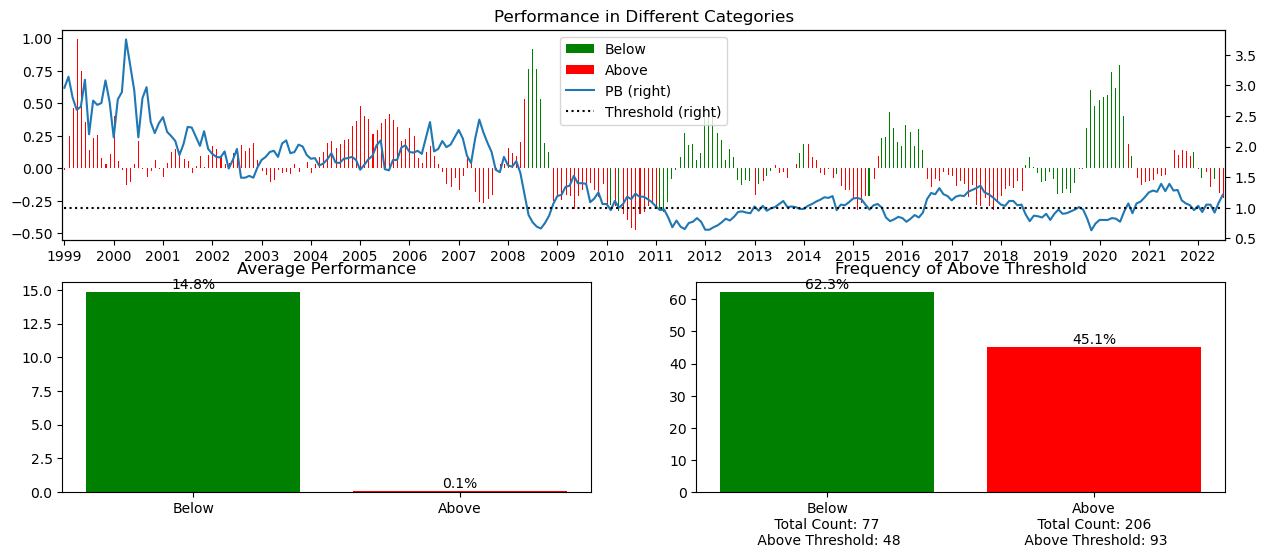

In [7]:
fig = plt.figure()
ax1 = plt.subplot(211)
performance_summary1.plot_performance_by_category(ax = ax1, category_colors = ['g','r'],df_overlay = df_PB_overlay,
                                                   overlay_color = ['C0','k'], overlay_style = ['-', ':'])


ax2 = plt.subplot(223)
performance_summary1.plot_comparing_mean_performance(ax = ax2, category_colors = ['g','r'])

ax3 = plt.subplot(224)
performance_summary1.plot_frequency_above_threshold(0, ax = ax3, category_colors = ['g', 'r'])

plt.show()

# 2. Price-to-Book Above/Below 3 Year Moving Average

In [8]:
signal_2 = SignalCrossMovingAverage(df_GS_raw['PB'], window = 36)

category_names = {0: 'Below MV', 1: 'Above MV'}
performance_summary2 = PerformanceByCategoty(df_forward_1_year_diff, signal_2(), category_names)

In [9]:
df_PB_overlay = pd.DataFrame(df_GS_raw['PB'])
df_PB_overlay['MV'] = signal_2.moving_average

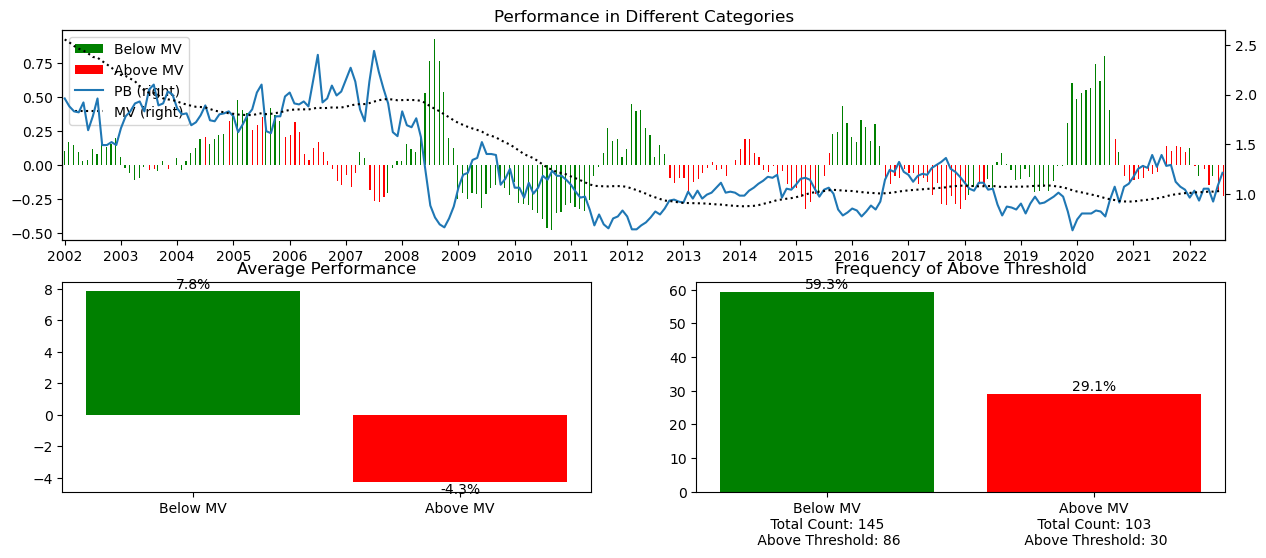

In [10]:
fig = plt.figure()
ax1 = plt.subplot(211)
performance_summary2.plot_performance_by_category(ax = ax1, category_colors = ['g','r'],df_overlay = df_PB_overlay,
                                                   overlay_color = ['C0','k'], overlay_style = ['-', ':'])


ax2 = plt.subplot(223)
performance_summary2.plot_comparing_mean_performance(ax = ax2, category_colors = ['g','r'])

ax3 = plt.subplot(224)
performance_summary2.plot_frequency_above_threshold(0, ax = ax3, category_colors = ['g', 'r'])

plt.show()

# 3. Price-to-Book Above/Below 3 Year Z-Score

In [11]:
signal_3 = SignalMovingZScore(df_GS_raw['PB'], window = 36, z_score = 1)

category_names = {0: 'Below Z', 1: 'Middle', 2: 'Above Z'}
performance_summary3 = PerformanceByCategoty(df_forward_1_year_diff, signal_3(), category_names)

In [12]:
df_PB_overlay = pd.DataFrame(signal_3.z_score_series)
df_PB_overlay['+Z'] = 1
df_PB_overlay['-Z'] = -1

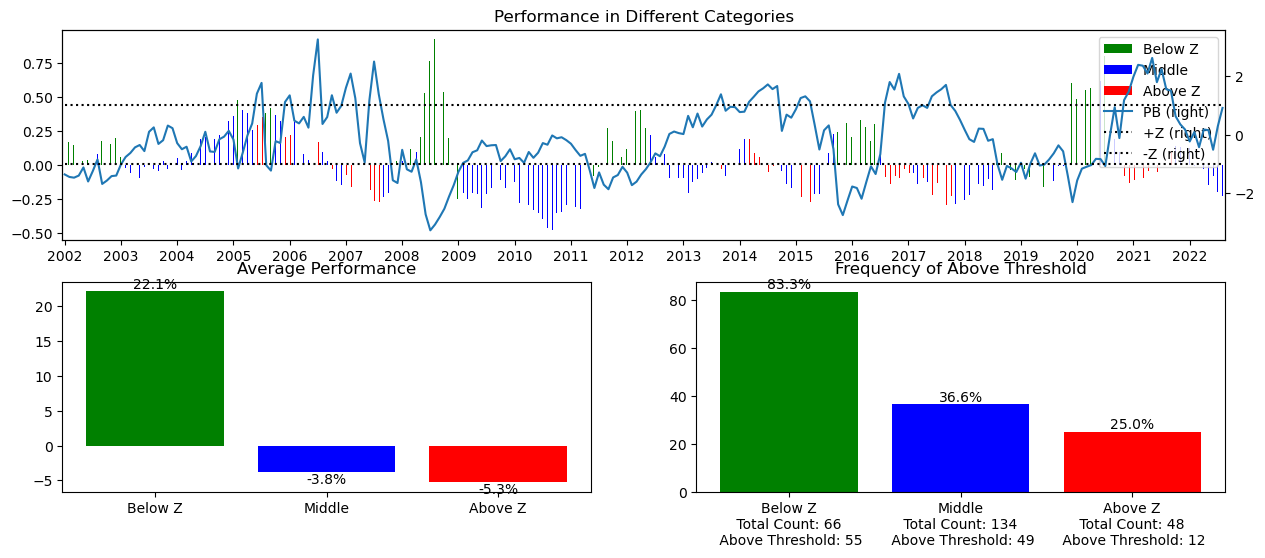

In [13]:
fig = plt.figure()
ax1 = plt.subplot(211)
performance_summary3.plot_performance_by_category(ax = ax1, category_colors = ['g','b','r'],df_overlay = df_PB_overlay,
                                                   overlay_color = ['C0','k', 'k'], overlay_style = ['-', ':', ':'])


ax2 = plt.subplot(223)
performance_summary3.plot_comparing_mean_performance(ax = ax2, category_colors = ['g','b','r'])

ax3 = plt.subplot(224)
performance_summary3.plot_frequency_above_threshold(0, ax = ax3, category_colors = ['g','b','r'])

plt.show()

# 4. Simplified Price-to-Book Above/Below 3 Year Z-Score

In [14]:
signal_4 = SignalMovingZScore(df_GS_raw['PB'], window = 36, z_score = 1)

df_signal = signal_4().replace({2:1})  # above treated as 1 category

category_names = {0: 'Below -Z', 1: 'Above -Z'}
performance_summary4 = PerformanceByCategoty(df_forward_1_year_diff, df_signal, category_names)

In [15]:
df_PB_overlay = pd.DataFrame(signal_4.z_score_series)
df_PB_overlay['Z Threshold'] = -1

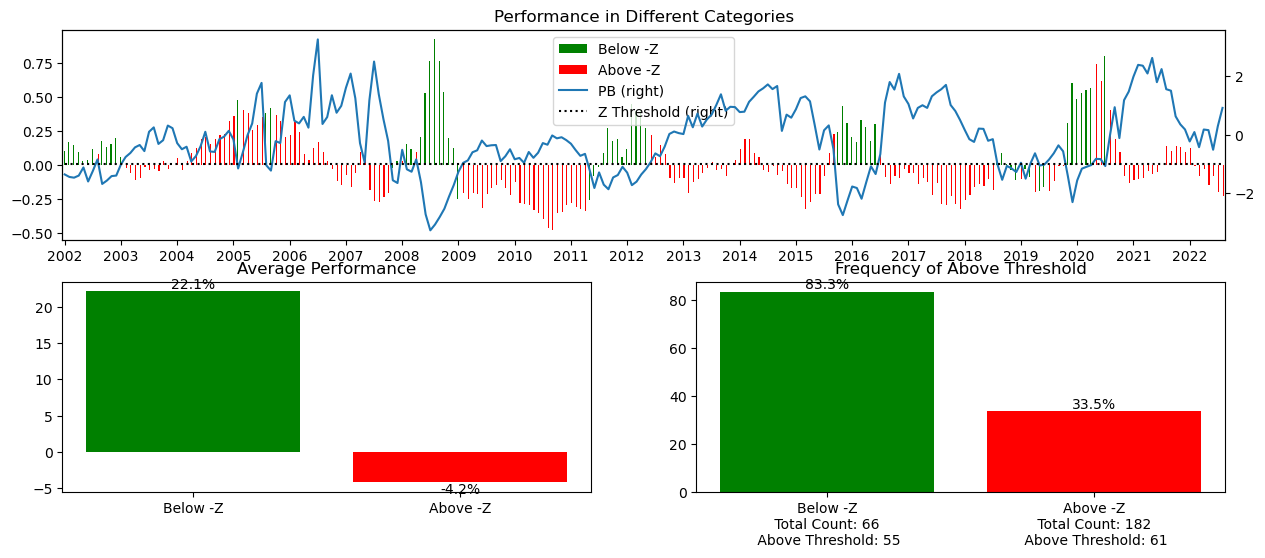

In [16]:
fig = plt.figure()
ax1 = plt.subplot(211)
performance_summary4.plot_performance_by_category(ax = ax1, category_colors = ['g','r'],df_overlay = df_PB_overlay,
                                                   overlay_color = ['C0','k'], overlay_style = ['-', ':'])


ax2 = plt.subplot(223)
performance_summary4.plot_comparing_mean_performance(ax = ax2, category_colors = ['g','r'])

ax3 = plt.subplot(224)
performance_summary4.plot_frequency_above_threshold(0, ax = ax3, category_colors = ['g', 'r'])

plt.show()